In [331]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno
from collections import Counter

**1. Introducción**

El negocio de los seguros de vehículos es un sector de la industria de seguros que proporciona protección financiera a los conductores de automóviles en caso de accidentes, robos u otros eventos imprevistos. El subscriptor del seguro mitiga el riesgo a través de la transferencia de esta misma a la compañía aseguradora. 

Las compañías de seguros de automóviles utilizan una variedad de herramientas y técnicas para evaluar el riesgo asociado con cada conductor y vehículo, incluyendo el historial de manejo del conductor, la marca y modelo del vehículo, la ubicación geográfica y otros factores relevantes. 

Para garantizar la rentabilidad y sostenibilidad de esta industria, la prevención de fraude cumple una tarea fundamental y crítica. El fraude en el sector de los seguros de automóviles puede tener un impacto significativo en las finanzas de una aseguradora, ya que un impacto en el índice de siniestralidad y el cálculo de primas resulta en un aumento de costos.

En este trabajo, analizaremos el dataset de una compañia de seguros. Realizaremos un análisis exploratorio de datos para identificar patrones comunes y evaluar si aplicando árboles de decisión como método de machine learning nos permitiría alcanzar nuestro objetivo.

**Índice**
1. Introducción
2. Contexto
3. Preguntas de interés
4. Inspección de los datos
5. Limpieza de datos

    5.1. Datos duplicados
    
    5.2. Análisis y tratamiento de datos nulos
6. Perfil del denunciante fraudulento

    6.1 Genero y estado marital

    6.2 Rango etario
7. Características más comunes de vehículos reportados en denuncias fraudulentas

    7.1 Antiguedad

    7.2 Top 5 Marcas 

    7.3 Categoría   


**2. Contexto**
La prevención de fraude en las aseguradoras de vehículos implica la implementación de políticas y procedimientos para detectar y prevenir actividades fraudulentas. Estas medidas incluyen la identificación de patrones de comportamientos sospechosos, la evaluación de riesgos y la implementación de herramientas y técnicas de detección de fraude.

El objetivo es utilizar una variedad de herramientas y tecnologías para prevenir y detectar el fraude, como análisis de datos y aprendizaje automático para identificar patrones de comportamiento inusuales, verificación de información para garantizar la autenticidad de las reclamaciones y auditorías internas para garantizar el cumplimiento de las políticas y procedimientos de la aseguradora. Para lograr dicho objetivo, se identificaran patrones y/o tendencias en la población que comete fraude para posteriormente utilizar estos conocimientos para desarrollar estrategias de prevención de fraude dirigidas y mejorar las tasas de detección en general para ayudar a las aseguradoras a protegerse mejor contra pérdidas.

**3. Preguntas de interés**
Se plantean una serie de hipótesis que serán resueltas por medio del análisis exploratorio de datos.

¿Existe una la relación entre género y denuncias fraudulentas? Hay algún sexo predominante?

¿Qué marital status presenta más tendencia a realizar denuncias fraudulentas?

¿Se puede identificar un rango etario?

¿La antiguedad del vehículo asegurado es una variable relevante?

¿Cuáles son las marcas de los vehículos más utilizados al cometer fraude?

¿Influye la categoría del auto?

**4. Inspección de los datos**


In [332]:
df= pd.read_csv(r'C:\Users\moniq\Downloads\Datascience\primera entrega\fraud_oracle.csv', sep=';')

Este dataset de 15420 datos proporciona la siguiente información:

00) Month: mes en el que ocurrió el accidente

01) WeekOfMonth: semana en la que ocurrió el accidente

02) DayOfWeek: Día de la semana en que ocurrió el accidente

03) Make: Marca del vehículo

04) AccidentArea: Si el accidente fue en un área rural o urbana

05) DayOfWeekClaimed: Día de la semana en la que se hizo la denuncia

06) MonthClaimed: Mes en el que se hizo la denuncia

07) WeekOfMonthClaimed: Número de semana del mes en la que se hizo la denuncia

08) Sex: Género de la persona que realiza la denuncia

09) MaritalStatus: Estado cívil de la persona que hace la denuncia

10) Age: Edad de la persona que hace la denuncia

11) Fault: Si el culpable fue el dueño del seguro u otro involucrado

12) PolicyType: Combinación de tipo de auto y de tipo de póliza: Liability (contra terceros), Collision (Incluye daños al vehículo del propietario), All Perils (contra todo riesgo)

13) VehicleCatergory: Clasificación de tipo de auto

14) VehiclePrice: Precio del vehículo

15) FraudFound_P: Si el incidente fue fraudulento o no, columna a predecir

16) PolicyNumber: Número único de accidente, coincide con el número de filas del dataset

17) RepNumber: Numeración entre 1 y 16

18) Deductible: Costo del seguro

19) DriverRating: Calificación del piloto, puede ser data ordinal

20) Days_Policy_Accident: Rango adquisición del seguro y suceso del accidente

21) Days_Policy_Claim: Rango entre adquisición del seguro y denuncia del accidente

22) PastNumberOfClaims: Cantidad de denuncias anteriores realizadas por el dueño del vehículo

23) AgeOfVehicle: Edad del vehículo

24) AgeOfPolicyHolder: Edad del dueño del seguro

25) PoliceReportFiled: Si fue denunciado a la policía

26) WitnessPresent: Si hubo un testigo presente

27) AgentType: Internos son cuando el fraude es realizado por personas trabajando en la empresa de seguros. Externos son los fraudes en los que el seguro es engañado por personas independientes.

28) NumberOfSuppliments: Son daños al vehículo no registrados a la hora de la denuncia, daños extras que no se ven por el exterior, normalmente roturas en componentes internos como suspensión, chasis, etc

29) AddressChange_Claim: Si el dueño del seguro se mudó después de denunciar un accidente y cuanto tiempo después

30) NumberOfCars: Número de autos involucrados en el accidente

31) Year: Año en el que ocurrió el accidente

32) BasePolicy: Tipo de seguro

**5. Limpieza de datos**

Divideremos el proceso de limpieza de datos por dos secciones: eliminado de duplicados y tratamiento a datos nulos.

**5.1 Datos duplicados**

In [333]:
df = df.drop_duplicates()


**5.2 Análisis y tratamiento de datos nulos** 

Text(0.5, 1.0, 'Matrix de valores nulos')

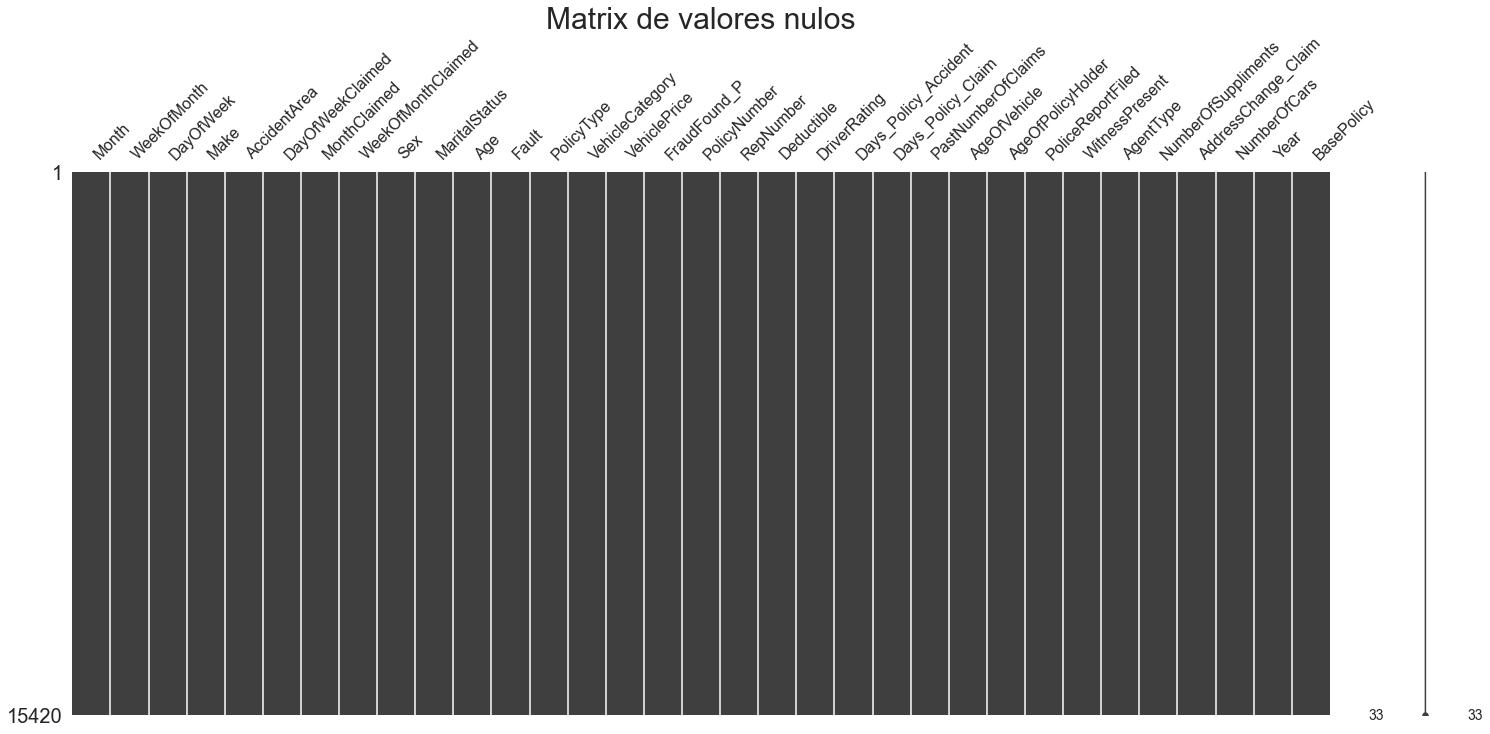

In [334]:
msno.matrix(df)
plt.title("Matrix de valores nulos",fontsize=30)

Tanto la matrix como el método .info() nos indica que no contamos con ninguna fila que contenga datos nulos. Se procederá a analizar si la información ingresada en el dataset es coherente.

In [335]:
#for column in df:
#    print(column)
#    print(sorted(df[column].unique()),"\n")

Se analizarán los 0 presentados en Age, DayOfWeekClaimed y MonthClaimed

In [336]:
#Analizo primero la edad
df_age_0 = df.loc[(df['Age'] == 0)]

In [337]:
df_age_0.AgeOfPolicyHolder.value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [338]:
#Como todos los casos con Age=0 indica que el AgeOfPolicyHolder se encuentra entre el rango de los 16-17años, reemplazo la edad por 17
df['Age'] = df['Age'].replace(0, 17)

In [339]:
#Creo una nueva variable "Age_coherent" para analizar si hay más casos inconsistentes entre las variables "Age" y "AgeOfPolicyHolder". 
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace("over 65", "66 to 110")

In [340]:
df["Age_coherent"] = df.apply(lambda x: True if int(x["Age"]) in range(int(x["AgeOfPolicyHolder"].split("to")[0]), int(x["AgeOfPolicyHolder"].split("to")[1])+1) else False, axis=1)

In [341]:
df[['start_age', 'end_age']] = df['AgeOfPolicyHolder'].str.split(' to ', expand=True).astype(int)
df['age_mean'] = (df['start_age'] + df['end_age']) / 2

In [342]:
df.loc[df['Age'] < df['start_age'], 'Age'] = df['age_mean']

In [343]:
df.loc[df['Age'] > df['end_age'], 'Age'] = df['age_mean']

In [367]:
#Analizo DayOfWeekClaimed y MonthClaimed 

#len(df.loc[df['DayOfWeekClaimed'] == '0'])
#len(df.loc[df['MonthClaimed'] == '0'])

In [346]:
#Remuevo los dos registros donde DayOfWeekClaimed= 0 y MonthClaimed= 0 ya que no tengo otras variables que pueda utilizar para interpolarlas.
df.drop(df[df['DayOfWeekClaimed'] == '0'].index)
df.drop(df[df['MonthClaimed'] == '0'].index)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Age_coherent,start_age,end_age,age_mean
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,External,none,1 year,3 to 4,1994,Liability,False,26,30,28.0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,External,none,no change,1 vehicle,1994,Collision,True,31,35,33.0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,External,none,no change,1 vehicle,1994,Collision,True,41,50,45.5
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,External,more than 5,no change,1 vehicle,1994,Liability,True,51,65,58.0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,External,none,no change,1 vehicle,1994,Collision,False,31,35,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,External,none,no change,1 vehicle,1996,Collision,True,31,35,33.0
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,External,more than 5,no change,3 to 4,1996,Liability,False,31,35,33.0
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,External,1 to 2,no change,1 vehicle,1996,Collision,False,26,30,28.0
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,External,more than 5,no change,1 vehicle,1996,All Perils,True,31,35,33.0


In [347]:
#Remuevo variables creadas para remediar la variable Age y también PolicyNumber ya que funciona cumple en este caso la misma función que el index. 
df_cleaned = df.copy().drop(['Age_coherent','start_age','end_age','age_mean','PolicyNumber'], axis=1)

In [348]:
#Normalizo los valores
df_cleaned=df_cleaned.rename(columns={'FraudFound_P': 'FraudFoundP', 'Days_Policy_Accident':'DaysPolicyAccident','Days_Policy_Claim':'DaysPolicyClaim','AddressChange_Claim':'AddressChangeClaim'})

In [349]:
df_cleaned['Age'] = df_cleaned['Age'].astype('int')

**6. Perfil del denunciante fraudulento**

Se proveerá de un primer panorama general de los datos y luego se procederá a analizar en detalle el género, estado marital y rango etario. 

In [350]:
#Creo subdataset para obtener solo la información de los reclamos fraudulentos filtrando por FraudFoundP=1

df_fraud = df_cleaned.loc[(df_cleaned['FraudFoundP'] == 1)]


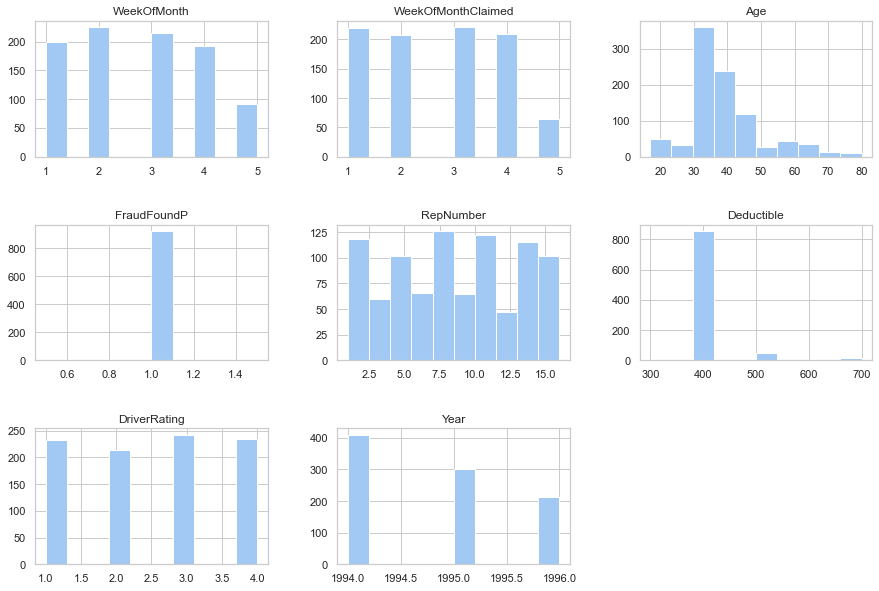

In [351]:
sns.set_palette("pastel")
df_fraud.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

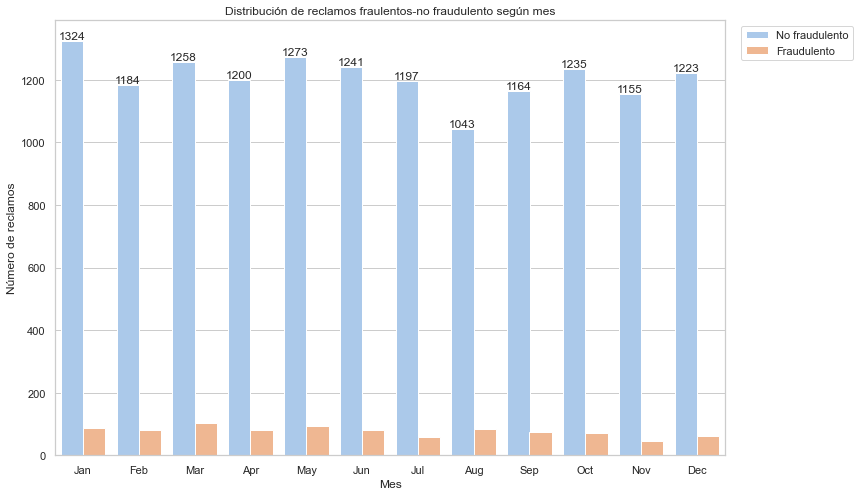

In [352]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 8))
labels = ['No fraudulento', 'Fraudulento']
fig = sns.countplot(x="Month", hue ='FraudFoundP', data=df_cleaned, order= month_order,palette='pastel' )
fig.bar_label(fig.containers[0], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraulentos-no fraudulento según mes')
plt.xlabel('Mes')
plt.ylabel('Número de reclamos')
plt.show()

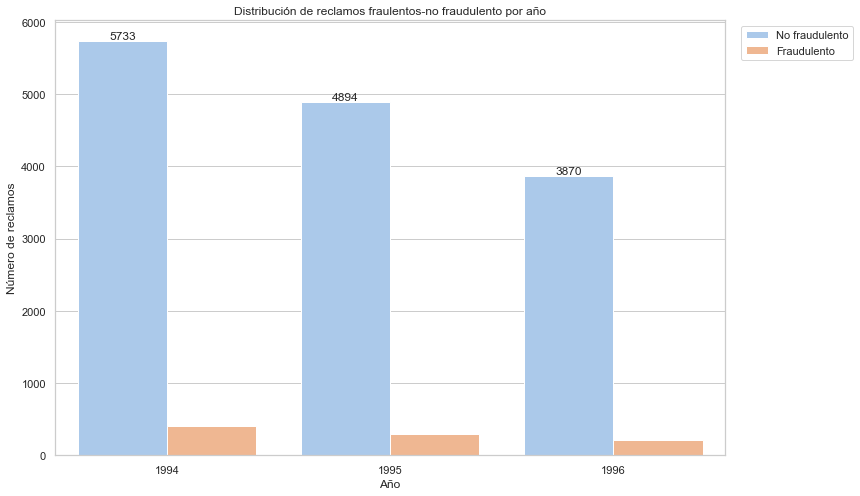

In [353]:
plt.figure(figsize=(12, 8))
labels = ['No fraudulento', 'Fraudulento']
fig = sns.countplot(x="Year", hue ='FraudFoundP', data=df_cleaned, palette='pastel')
fig.bar_label(fig.containers[0], label_type='edge');

plt.legend(labels,  bbox_to_anchor=(1.2, 1))
plt.title('Distribución de reclamos fraulentos-no fraudulento por año')
plt.xlabel('Año')
plt.ylabel('Número de reclamos')
plt.show()

In [354]:
#De este subdataset df_fraud, remuevo variables redundantes para analizar variables específicas que posibiliten identificar un perfil con caracteristicas comunes de quienes cometen fraude.
df_fraud_cleaned = df_fraud.copy().drop(['Month','WeekOfMonth','DayOfWeek','DayOfWeekClaimed', 'MonthClaimed','PolicyType','VehiclePrice', 'WeekOfMonthClaimed','RepNumber','Deductible','DriverRating', 'DaysPolicyAccident','AccidentArea','Year','PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments'], axis=1)

 **6.1 Género y estado marital**

Text(0.5, 1.0, 'Estado marital segmentado por sexo')

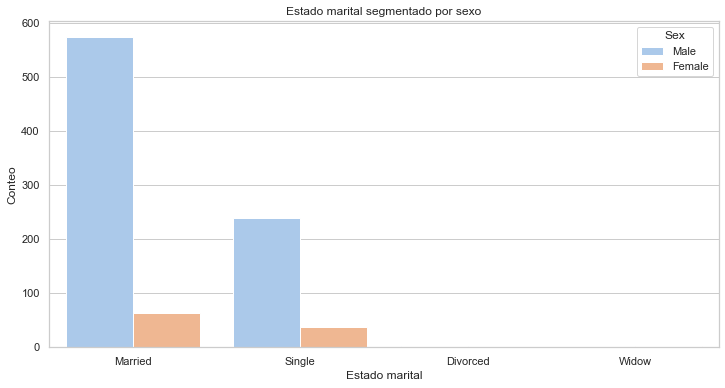

In [355]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MaritalStatus', hue='Sex', data=df_fraud_cleaned, order=df_fraud_cleaned['MaritalStatus'].value_counts(ascending=False).index,palette='pastel')
plt.xlabel('Estado marital')
plt.ylabel('Conteo')
plt.title("Estado marital segmentado por sexo")

Las denuncias se realizaron primariamente por personas con estado marital de casado, seguido por soltero. No hubieron denuncias realizadas con estado martial divorciado o viudo.

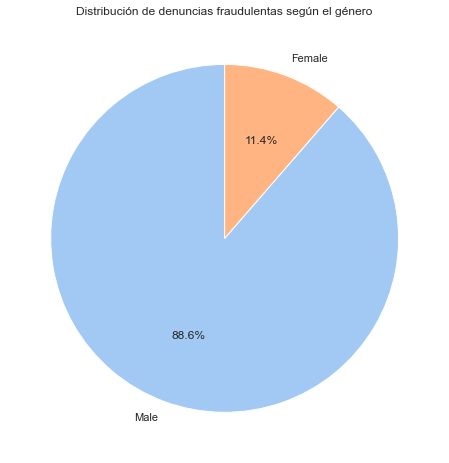

In [356]:
counts = df_fraud_cleaned['Sex'].value_counts() 
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de denuncias fraudulentas según el género')
plt.show()

De la población que cometió fraude, un 88,6% de los denunciantes fueron hombres y un 11,4% mujeres.

 **6.2 Rango etario**

Text(0.5, 1.0, 'Sexo segmentado por rango de edad del asegurado')

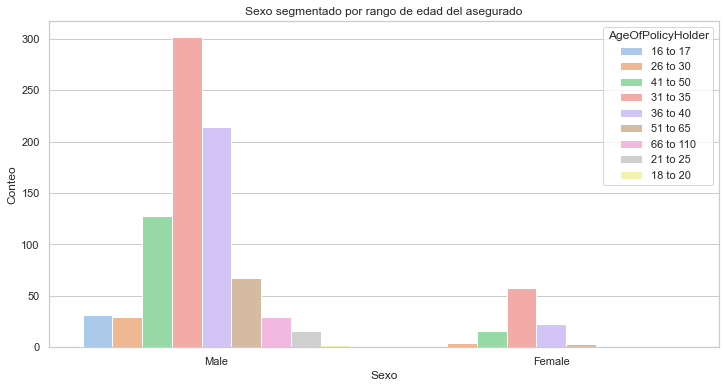

In [357]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Sex', hue='AgeOfPolicyHolder', data=df_fraud_cleaned,palette='pastel')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.title("Sexo segmentado por rango de edad del asegurado")

Text(0.5, 1.0, 'Edad')

<Figure size 576x576 with 0 Axes>

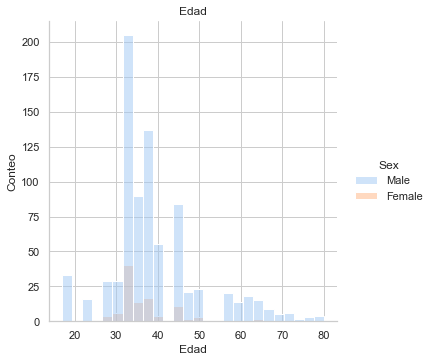

In [358]:
plt.figure(figsize=(8, 8))
sns.displot(df_fraud_cleaned,x ='Age',hue = 'Sex', palette='pastel')
plt.xlabel('Edad')
plt.ylabel('Conteo')
plt.title("Edad")

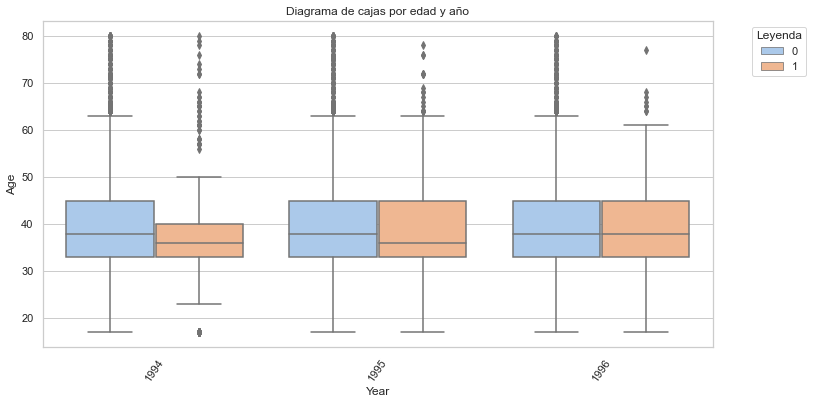

In [359]:
plt.figure(figsize=(12, 6))
sns.boxplot(data= df_cleaned, x= 'Year', y='Age', hue= 'FraudFoundP',palette='pastel')
plt.legend(title="Leyenda", loc="upper left", bbox_to_anchor=(1.05, 1))
plt.xticks(rotation = 55)
plt.title("Diagrama de cajas por edad y año")
plt.show()


En cuanto a la edad, se observa en el primer gráfico de la sección 6.2 que dentro de la subpoblación de denuncias fraudulentas, tanto hombres como mujeres con edades entre 31 y 35  son quienes más reportan, seguidos por quienes tienen entre 36 y 40 años. Sin embargo, se puede reducir este rango aún más, ya que el segundo gráfico de la misma sección muestra que la moda se encuentra entre los 32-34 años. 

Asimismo, el último gráfico nos revela que el rango de edades en el que se encuentra el cuartil 1, 2 y 3 no sufren de variaciones significativas para los años 1994, 1995 y 1996 en las denuncias no fradulentas. Este no es el caso para las denuncias fraudulentas ya que el tercer cuartil varia considerablemente del año 1994 a 1995 aunque la mediana ronda por el valor de los 36 años para los 3 años.

**7. Características más comunes de vehículos reportados en denuncias fraudulentas**

Se analizará la antiguedad, marcas y categoría.

**7.1 Antiguedad**

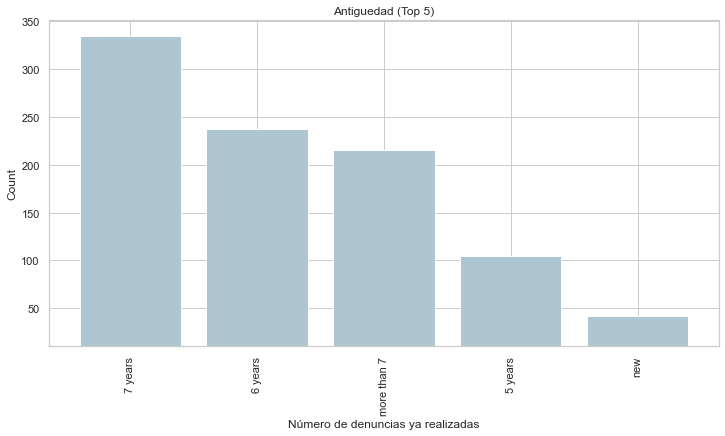

In [360]:
PastNumberOfClaims_count = df_fraud_cleaned['AgeOfVehicle']
freqs = Counter(PastNumberOfClaims_count)

top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))

plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values(), color='#AEC6CF', width=0.8, bottom=10)
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Número de denuncias ya realizadas')
plt.ylabel('Count')
plt.title("Antiguedad (Top 5)")
plt.show()



Este análisis nos confirma que en los siniestros automovilísticos fraudulentos, es más frecuente utilizar vehículos donde su antiguedad exceda los 5 años de vida. 

**7.2 Top 5 Marcas**

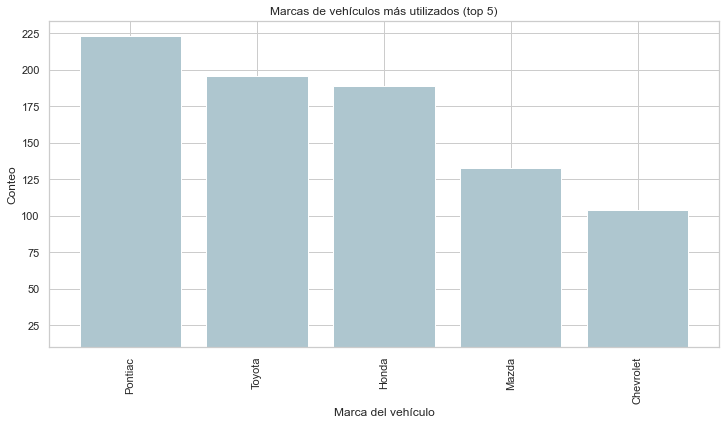

In [361]:
Make_count = df_fraud_cleaned['Make']
freqs = Counter(Make_count)
top_freqs = dict(sorted(freqs.items(), key=lambda item: item[1], reverse=True)[:5])
xvals = range(len(top_freqs.values()))
plt.figure(figsize=(12, 6))
plt.bar(xvals, top_freqs.values() , color='#AEC6CF', width=0.8, bottom= 10)
plt.xticks(xvals, top_freqs.keys(), rotation='vertical')
plt.xlabel('Marca del vehículo')
plt.ylabel('Conteo')
plt.title("Marcas de vehículos más utilizados (top 5)")
plt.show()

Las top 5 marcas reportadas en denuncias fraudulentas son: Pontiac, Toyota, Honda, Mazda, Chevrolet

**7.3 Categoría**

Text(0.5, 1.0, 'Relación entre sexo y categoría del vehiculo')

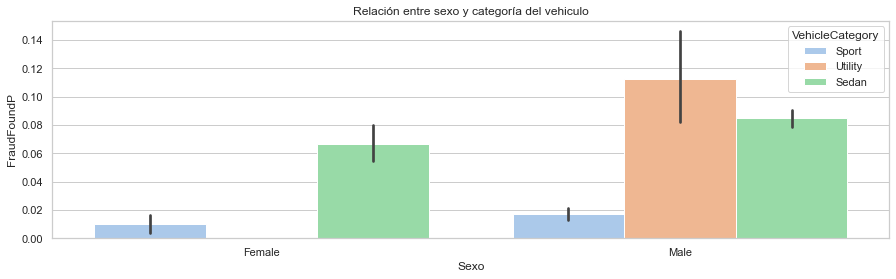

In [362]:
sns.set(style="whitegrid") 
plt.figure(figsize=(15,4))
ax=sns.barplot(x = 'Sex', y = 'FraudFoundP', hue = 'VehicleCategory', data = df_cleaned,palette='pastel')
plt.xlabel('Sexo')
plt.title('Relación entre sexo y categoría del vehiculo')

En cuanto a las categorías, éstas son Utility y Sedan.